## Importing Required Libraries

In [1]:
##This notebook is built around using tensorflow as the backend for keras
!pip install pillow
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Assigning Path for Dataset

In [4]:
# dimensions of our images.
img_width, img_height = 256, 256
train_data_dir = "/content/drive/MyDrive/hist_ben_split/train"
validation_data_dir = "/content/drive/MyDrive/hist_ben_split/val"

In [5]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='binary')

Found 2716 images belonging to 2 classes.
Found 776 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'benign': 0, 'histiosit': 1}

In [7]:
from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10  # 1000 images = batch_size * steps
      )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
20/20 [==============================] - 180s 8s/step - loss: 1.2490 - acc: 0.6125 - val_loss: 0.2197 - val_acc: 0.9300
Epoch 2/100
20/20 [==============================] - 124s 6s/step - loss: 0.3341 - acc: 0.8875 - val_loss: 0.1329 - val_acc: 0.9550
Epoch 3/100
20/20 [==============================] - 93s 5s/step - loss: 0.2404 - acc: 0.9300 - val_loss: 0.1062 - val_acc: 0.9650
Epoch 4/100
20/20 [==============================] - 74s 4s/step - loss: 0.3035 - acc: 0.9325 - val_loss: 0.0878 - val_acc: 0.9750
Epoch 5/100
20/20 [==============================] - 67s 3s/step - loss: 0.0412 - acc: 0.9924 - val_loss: 0.0839 - val_acc: 0.9800
Epoch 6/100
20/20 [==============================] - 51s 3s/step - loss: 0.1190 - acc: 0.9700 - val_loss: 0.0406 - val_acc: 0.9850
Epoch 7/100
20/20 [==============================] - 41s 2s/step - loss: 0.1351 - acc: 0.9575 - val_loss: 0.0512 - val_acc: 0.9900
Epoch 8/100
20/20 [==============================] - 28s 1s/step - loss: 0.0717 -

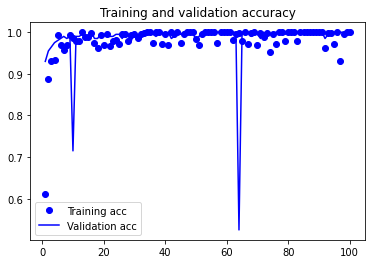

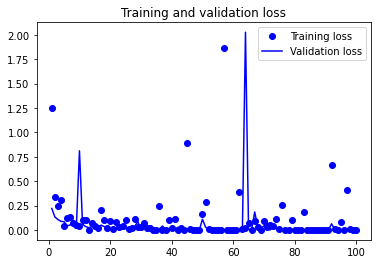

In [10]:
model.save('Histiosit_Cancerious_NonCancerious.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

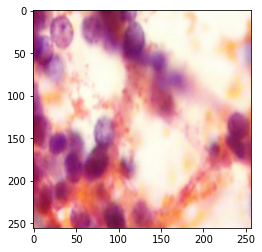

This is benign Cell


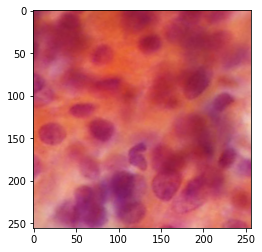

This is benign Cell


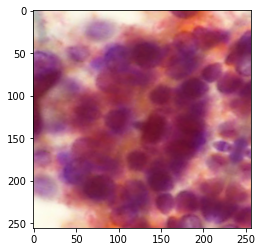

This is benign Cell


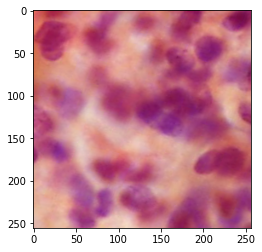

This is benign Cell


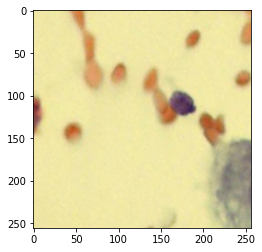

This is Histoit Cell


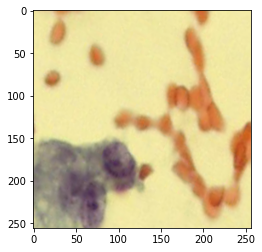

This is Histoit Cell


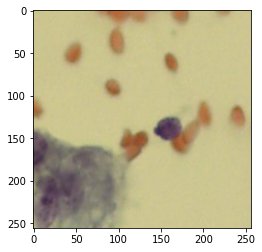

This is Histoit Cell


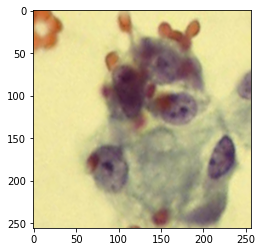

This is benign Cell


In [15]:
from tensorflow.keras.preprocessing import image
new_path = '/content/drive/MyDrive/DS/hist_ben_test'
for i in os.listdir(new_path):
  img = image.load_img(new_path+'//'+ i, target_size=(256,256))
 
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis =0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("This is benign Cell")
  else:
    print("This is Histoit Cell")
